# 1. Import thư viện

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchsummary import summary
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from models.hqsr import *

In [2]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. Tạo Mô hình SR

In [3]:
class ImageDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, scale, valid = False):
        self.lr_files = sorted(os.listdir(lr_dir))
        self.hr_files = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.scale = scale
        self.valid = valid

    def __len__(self):
        return len(self.lr_files)

    def __getitem__(self, idx):
        lr_image = Image.open(os.path.join(self.lr_dir, self.lr_files[idx])).convert('RGB')
        hr_image = Image.open(os.path.join(self.hr_dir, self.hr_files[idx])).convert('RGB')
    
        w, h= hr_image.size
        if self.valid:
            lr_image = lr_image.resize((w//self.scale, h//self.scale))
        transform = transforms.Compose([
            transforms.ToTensor()
        ])
        
        lr_image = transform(lr_image)
        hr_image = transform(hr_image)
        return lr_image, hr_image

# 3. Tạo Hyperparameter

In [4]:
# Đường dẫn tới bộ dữ liệu

# test_hr_dir  = '/kaggle/input/srdataset/sr_data/test/HR'
# test_lr_dir  = '/kaggle/input/srdataset/sr_data/test/LR'

# print(torch.cuda.memory_allocated())
# print(torch.cuda.memory_reserved())

In [5]:
import os
os.environ["TORCH_USE_CUDA_DSA"] = "1"
os.environ["CUDA_LAUNCH_BLOCKING"]="1"

In [6]:
def calculate_psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
    return psnr.item()

# 4. Training

Validation Epoch 1/24: 100%|██████████| 10/10 [00:06<00:00,  1.51batch/s]


Epoch 1/24, Loss sobel: 0.0012, Loss canny: 0.0012, Time training: 1241.8392s, PSNR sobel: 30.15 dB, PSNR canny: 30.07 dB, Val PSNR sobel: 32.47 dB, Val PSNR canny: 32.38 dB
Saved Sobel SR model with PSNR 32.4697
Saved Canny SR model with PSNR 32.3764


Validation Epoch 2/24: 100%|██████████| 10/10 [00:06<00:00,  1.54batch/s]


Epoch 2/24, Loss sobel: 0.0009, Loss canny: 0.0009, Time training: 1203.9185s, PSNR sobel: 31.07 dB, PSNR canny: 31.04 dB, Val PSNR sobel: 33.05 dB, Val PSNR canny: 33.10 dB
Saved Sobel SR model with PSNR 33.0539
Saved Canny SR model with PSNR 33.0966


Validation Epoch 3/24: 100%|██████████| 10/10 [00:06<00:00,  1.55batch/s]


Epoch 3/24, Loss sobel: 0.0008, Loss canny: 0.0008, Time training: 1180.0706s, PSNR sobel: 31.34 dB, PSNR canny: 31.32 dB, Val PSNR sobel: 33.53 dB, Val PSNR canny: 33.49 dB
Saved Sobel SR model with PSNR 33.5301
Saved Canny SR model with PSNR 33.4867


Validation Epoch 4/24: 100%|██████████| 10/10 [00:06<00:00,  1.55batch/s]


Epoch 4/24, Loss sobel: 0.0008, Loss canny: 0.0008, Time training: 1174.2891s, PSNR sobel: 31.48 dB, PSNR canny: 31.47 dB, Val PSNR sobel: 33.71 dB, Val PSNR canny: 33.68 dB
Saved Sobel SR model with PSNR 33.7078
Saved Canny SR model with PSNR 33.6826


Validation Epoch 5/24: 100%|██████████| 10/10 [00:06<00:00,  1.54batch/s]


Epoch 5/24, Loss sobel: 0.0008, Loss canny: 0.0008, Time training: 1175.4595s, PSNR sobel: 31.60 dB, PSNR canny: 31.58 dB, Val PSNR sobel: 33.69 dB, Val PSNR canny: 33.72 dB
Saved Canny SR model with PSNR 33.7179


Validation Epoch 6/24: 100%|██████████| 10/10 [00:06<00:00,  1.54batch/s]


Epoch 6/24, Loss sobel: 0.0008, Loss canny: 0.0008, Time training: 1166.0182s, PSNR sobel: 31.67 dB, PSNR canny: 31.65 dB, Val PSNR sobel: 33.85 dB, Val PSNR canny: 33.85 dB
Saved Sobel SR model with PSNR 33.8547
Saved Canny SR model with PSNR 33.8485


Validation Epoch 7/24: 100%|██████████| 10/10 [00:06<00:00,  1.56batch/s]


Epoch 7/24, Loss sobel: 0.0007, Loss canny: 0.0008, Time training: 1169.7437s, PSNR sobel: 31.73 dB, PSNR canny: 31.72 dB, Val PSNR sobel: 33.80 dB, Val PSNR canny: 33.88 dB
Saved Canny SR model with PSNR 33.8826


Validation Epoch 8/24: 100%|██████████| 10/10 [00:06<00:00,  1.56batch/s]


Epoch 8/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1181.5956s, PSNR sobel: 31.78 dB, PSNR canny: 31.77 dB, Val PSNR sobel: 33.98 dB, Val PSNR canny: 33.94 dB
Saved Sobel SR model with PSNR 33.9830
Saved Canny SR model with PSNR 33.9425


Validation Epoch 9/24: 100%|██████████| 10/10 [00:06<00:00,  1.56batch/s]


Epoch 9/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1192.0281s, PSNR sobel: 31.90 dB, PSNR canny: 31.89 dB, Val PSNR sobel: 34.12 dB, Val PSNR canny: 34.13 dB
Saved Sobel SR model with PSNR 34.1172
Saved Canny SR model with PSNR 34.1288


Validation Epoch 10/24: 100%|██████████| 10/10 [00:06<00:00,  1.54batch/s]


Epoch 10/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1206.1055s, PSNR sobel: 31.92 dB, PSNR canny: 31.91 dB, Val PSNR sobel: 34.08 dB, Val PSNR canny: 34.10 dB


Validation Epoch 11/24: 100%|██████████| 10/10 [00:06<00:00,  1.55batch/s]


Epoch 11/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1216.0501s, PSNR sobel: 31.94 dB, PSNR canny: 31.93 dB, Val PSNR sobel: 34.12 dB, Val PSNR canny: 34.13 dB
Saved Sobel SR model with PSNR 34.1205
Saved Canny SR model with PSNR 34.1322


Validation Epoch 12/24: 100%|██████████| 10/10 [00:06<00:00,  1.55batch/s]


Epoch 12/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1221.2280s, PSNR sobel: 31.95 dB, PSNR canny: 31.94 dB, Val PSNR sobel: 34.16 dB, Val PSNR canny: 34.14 dB
Saved Sobel SR model with PSNR 34.1599
Saved Canny SR model with PSNR 34.1442


Validation Epoch 13/24: 100%|██████████| 10/10 [00:06<00:00,  1.56batch/s]


Epoch 13/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1227.1382s, PSNR sobel: 31.98 dB, PSNR canny: 31.97 dB, Val PSNR sobel: 34.12 dB, Val PSNR canny: 34.15 dB
Saved Canny SR model with PSNR 34.1488


Validation Epoch 14/24: 100%|██████████| 10/10 [00:06<00:00,  1.54batch/s]


Epoch 14/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1228.7674s, PSNR sobel: 31.99 dB, PSNR canny: 31.98 dB, Val PSNR sobel: 34.10 dB, Val PSNR canny: 34.13 dB


Validation Epoch 15/24: 100%|██████████| 10/10 [00:06<00:00,  1.54batch/s]


Epoch 15/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1232.0356s, PSNR sobel: 32.01 dB, PSNR canny: 32.00 dB, Val PSNR sobel: 34.11 dB, Val PSNR canny: 34.16 dB
Saved Canny SR model with PSNR 34.1553


Validation Epoch 16/24: 100%|██████████| 10/10 [00:06<00:00,  1.55batch/s]


Epoch 16/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1234.6052s, PSNR sobel: 32.02 dB, PSNR canny: 32.01 dB, Val PSNR sobel: 34.17 dB, Val PSNR canny: 34.16 dB
Saved Sobel SR model with PSNR 34.1696
Saved Canny SR model with PSNR 34.1615


Validation Epoch 17/24: 100%|██████████| 10/10 [00:06<00:00,  1.55batch/s]


Epoch 17/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1254.0759s, PSNR sobel: 32.08 dB, PSNR canny: 32.07 dB, Val PSNR sobel: 34.18 dB, Val PSNR canny: 34.21 dB
Saved Sobel SR model with PSNR 34.1793
Saved Canny SR model with PSNR 34.2097


Validation Epoch 18/24: 100%|██████████| 10/10 [00:06<00:00,  1.58batch/s]


Epoch 18/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1403.7707s, PSNR sobel: 32.09 dB, PSNR canny: 32.07 dB, Val PSNR sobel: 34.21 dB, Val PSNR canny: 34.23 dB
Saved Sobel SR model with PSNR 34.2143
Saved Canny SR model with PSNR 34.2316


Validation Epoch 19/24: 100%|██████████| 10/10 [00:06<00:00,  1.60batch/s]


Epoch 19/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1190.4007s, PSNR sobel: 32.10 dB, PSNR canny: 32.09 dB, Val PSNR sobel: 34.22 dB, Val PSNR canny: 34.24 dB
Saved Sobel SR model with PSNR 34.2192
Saved Canny SR model with PSNR 34.2352


Validation Epoch 20/24: 100%|██████████| 10/10 [00:06<00:00,  1.61batch/s]


Epoch 20/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1161.7242s, PSNR sobel: 32.10 dB, PSNR canny: 32.09 dB, Val PSNR sobel: 34.20 dB, Val PSNR canny: 34.19 dB


Validation Epoch 21/24: 100%|██████████| 10/10 [00:06<00:00,  1.60batch/s]


Epoch 21/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1160.3165s, PSNR sobel: 32.12 dB, PSNR canny: 32.10 dB, Val PSNR sobel: 34.20 dB, Val PSNR canny: 34.21 dB


Validation Epoch 22/24: 100%|██████████| 10/10 [00:06<00:00,  1.59batch/s]


Epoch 22/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1162.5078s, PSNR sobel: 32.11 dB, PSNR canny: 32.10 dB, Val PSNR sobel: 34.18 dB, Val PSNR canny: 34.20 dB


Validation Epoch 23/24: 100%|██████████| 10/10 [00:06<00:00,  1.59batch/s]


Epoch 23/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1160.7256s, PSNR sobel: 32.13 dB, PSNR canny: 32.12 dB, Val PSNR sobel: 34.20 dB, Val PSNR canny: 34.24 dB
Saved Canny SR model with PSNR 34.2387


Validation Epoch 24/24: 100%|██████████| 10/10 [00:06<00:00,  1.59batch/s]


Epoch 24/24, Loss sobel: 0.0007, Loss canny: 0.0007, Time training: 1162.4189s, PSNR sobel: 32.12 dB, PSNR canny: 32.11 dB, Val PSNR sobel: 34.21 dB, Val PSNR canny: 34.23 dB


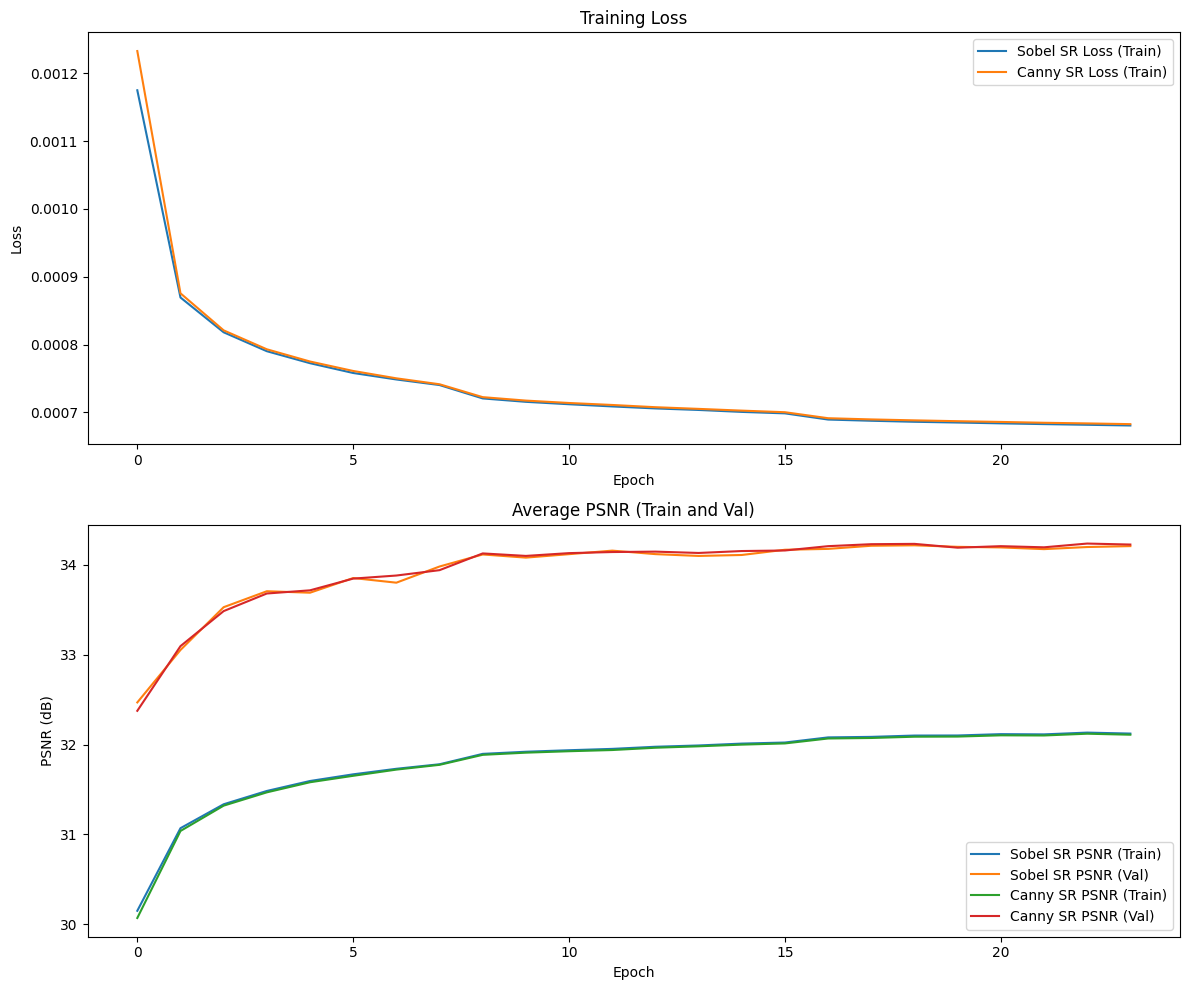

Validation Epoch 1/24: 100%|██████████| 10/10 [00:03<00:00,  2.67batch/s]


Epoch 1/24, Loss sobel: 0.0023, Loss canny: 0.0023, Time training: 898.6499s, PSNR sobel: 27.00 dB, PSNR canny: 27.04 dB, Val PSNR sobel: 28.61 dB, Val PSNR canny: 28.60 dB
Saved Sobel SR model with PSNR 28.6118
Saved Canny SR model with PSNR 28.6025


Validation Epoch 2/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 2/24, Loss sobel: 0.0019, Loss canny: 0.0018, Time training: 847.3895s, PSNR sobel: 27.73 dB, PSNR canny: 27.73 dB, Val PSNR sobel: 29.11 dB, Val PSNR canny: 29.11 dB
Saved Sobel SR model with PSNR 29.1132
Saved Canny SR model with PSNR 29.1075


Validation Epoch 3/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 3/24, Loss sobel: 0.0018, Loss canny: 0.0018, Time training: 851.9782s, PSNR sobel: 27.93 dB, PSNR canny: 27.94 dB, Val PSNR sobel: 29.34 dB, Val PSNR canny: 29.39 dB
Saved Sobel SR model with PSNR 29.3376
Saved Canny SR model with PSNR 29.3903


Validation Epoch 4/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 4/24, Loss sobel: 0.0017, Loss canny: 0.0017, Time training: 848.9839s, PSNR sobel: 28.06 dB, PSNR canny: 28.06 dB, Val PSNR sobel: 29.43 dB, Val PSNR canny: 29.43 dB
Saved Sobel SR model with PSNR 29.4302
Saved Canny SR model with PSNR 29.4347


Validation Epoch 5/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 5/24, Loss sobel: 0.0017, Loss canny: 0.0017, Time training: 846.4869s, PSNR sobel: 28.13 dB, PSNR canny: 28.13 dB, Val PSNR sobel: 29.60 dB, Val PSNR canny: 29.63 dB
Saved Sobel SR model with PSNR 29.6043
Saved Canny SR model with PSNR 29.6261


Validation Epoch 6/24: 100%|██████████| 10/10 [00:03<00:00,  2.69batch/s]


Epoch 6/24, Loss sobel: 0.0017, Loss canny: 0.0017, Time training: 848.9856s, PSNR sobel: 28.18 dB, PSNR canny: 28.18 dB, Val PSNR sobel: 29.69 dB, Val PSNR canny: 29.69 dB
Saved Sobel SR model with PSNR 29.6883
Saved Canny SR model with PSNR 29.6887


Validation Epoch 7/24: 100%|██████████| 10/10 [00:03<00:00,  2.69batch/s]


Epoch 7/24, Loss sobel: 0.0017, Loss canny: 0.0017, Time training: 850.1961s, PSNR sobel: 28.23 dB, PSNR canny: 28.23 dB, Val PSNR sobel: 29.72 dB, Val PSNR canny: 29.71 dB
Saved Sobel SR model with PSNR 29.7200
Saved Canny SR model with PSNR 29.7063


Validation Epoch 8/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 8/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 845.8875s, PSNR sobel: 28.26 dB, PSNR canny: 28.27 dB, Val PSNR sobel: 29.73 dB, Val PSNR canny: 29.71 dB
Saved Sobel SR model with PSNR 29.7282
Saved Canny SR model with PSNR 29.7143


Validation Epoch 9/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 9/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 850.8929s, PSNR sobel: 28.36 dB, PSNR canny: 28.36 dB, Val PSNR sobel: 29.85 dB, Val PSNR canny: 29.85 dB
Saved Sobel SR model with PSNR 29.8457
Saved Canny SR model with PSNR 29.8520


Validation Epoch 10/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 10/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 849.0846s, PSNR sobel: 28.39 dB, PSNR canny: 28.39 dB, Val PSNR sobel: 29.86 dB, Val PSNR canny: 29.87 dB
Saved Sobel SR model with PSNR 29.8552
Saved Canny SR model with PSNR 29.8719


Validation Epoch 11/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 11/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 847.8910s, PSNR sobel: 28.40 dB, PSNR canny: 28.40 dB, Val PSNR sobel: 29.83 dB, Val PSNR canny: 29.88 dB
Saved Canny SR model with PSNR 29.8824


Validation Epoch 12/24: 100%|██████████| 10/10 [00:03<00:00,  2.69batch/s]


Epoch 12/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 847.4068s, PSNR sobel: 28.42 dB, PSNR canny: 28.42 dB, Val PSNR sobel: 29.87 dB, Val PSNR canny: 29.89 dB
Saved Sobel SR model with PSNR 29.8714
Saved Canny SR model with PSNR 29.8862


Validation Epoch 13/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 13/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 849.2728s, PSNR sobel: 28.43 dB, PSNR canny: 28.43 dB, Val PSNR sobel: 29.88 dB, Val PSNR canny: 29.88 dB
Saved Sobel SR model with PSNR 29.8815


Validation Epoch 14/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 14/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 846.8454s, PSNR sobel: 28.45 dB, PSNR canny: 28.44 dB, Val PSNR sobel: 29.85 dB, Val PSNR canny: 29.87 dB


Validation Epoch 15/24: 100%|██████████| 10/10 [00:03<00:00,  2.69batch/s]


Epoch 15/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 847.8442s, PSNR sobel: 28.45 dB, PSNR canny: 28.45 dB, Val PSNR sobel: 29.91 dB, Val PSNR canny: 29.91 dB
Saved Sobel SR model with PSNR 29.9120
Saved Canny SR model with PSNR 29.9093


Validation Epoch 16/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 16/24, Loss sobel: 0.0016, Loss canny: 0.0016, Time training: 847.4359s, PSNR sobel: 28.47 dB, PSNR canny: 28.47 dB, Val PSNR sobel: 29.86 dB, Val PSNR canny: 29.87 dB


Validation Epoch 17/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 17/24, Loss sobel: 0.0015, Loss canny: 0.0015, Time training: 849.6199s, PSNR sobel: 28.52 dB, PSNR canny: 28.51 dB, Val PSNR sobel: 29.93 dB, Val PSNR canny: 29.93 dB
Saved Sobel SR model with PSNR 29.9288
Saved Canny SR model with PSNR 29.9253


Validation Epoch 18/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 18/24, Loss sobel: 0.0015, Loss canny: 0.0015, Time training: 848.5292s, PSNR sobel: 28.53 dB, PSNR canny: 28.53 dB, Val PSNR sobel: 29.96 dB, Val PSNR canny: 29.95 dB
Saved Sobel SR model with PSNR 29.9552
Saved Canny SR model with PSNR 29.9515


Validation Epoch 19/24: 100%|██████████| 10/10 [00:03<00:00,  2.69batch/s]


Epoch 19/24, Loss sobel: 0.0015, Loss canny: 0.0015, Time training: 849.3609s, PSNR sobel: 28.54 dB, PSNR canny: 28.54 dB, Val PSNR sobel: 29.95 dB, Val PSNR canny: 29.94 dB


Validation Epoch 20/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]


Epoch 20/24, Loss sobel: 0.0015, Loss canny: 0.0015, Time training: 847.8070s, PSNR sobel: 28.55 dB, PSNR canny: 28.55 dB, Val PSNR sobel: 29.95 dB, Val PSNR canny: 29.95 dB


Validation Epoch 21/24: 100%|██████████| 10/10 [00:03<00:00,  2.69batch/s]


Epoch 21/24, Loss sobel: 0.0015, Loss canny: 0.0015, Time training: 850.3402s, PSNR sobel: 28.55 dB, PSNR canny: 28.55 dB, Val PSNR sobel: 29.94 dB, Val PSNR canny: 29.94 dB


Validation Epoch 22/24: 100%|██████████| 10/10 [00:03<00:00,  2.69batch/s]


Epoch 22/24, Loss sobel: 0.0015, Loss canny: 0.0015, Time training: 848.4665s, PSNR sobel: 28.56 dB, PSNR canny: 28.55 dB, Val PSNR sobel: 29.94 dB, Val PSNR canny: 29.94 dB


Validation Epoch 23/24: 100%|██████████| 10/10 [00:03<00:00,  2.70batch/s]

Epoch 23/24, Loss sobel: 0.0015, Loss canny: 0.0015, Time training: 849.5749s, PSNR sobel: 28.56 dB, PSNR canny: 28.56 dB, Val PSNR sobel: 29.93 dB, Val PSNR canny: 29.92 dB
PSNR did not improve for 50 epochs. Early stopping at epoch 23


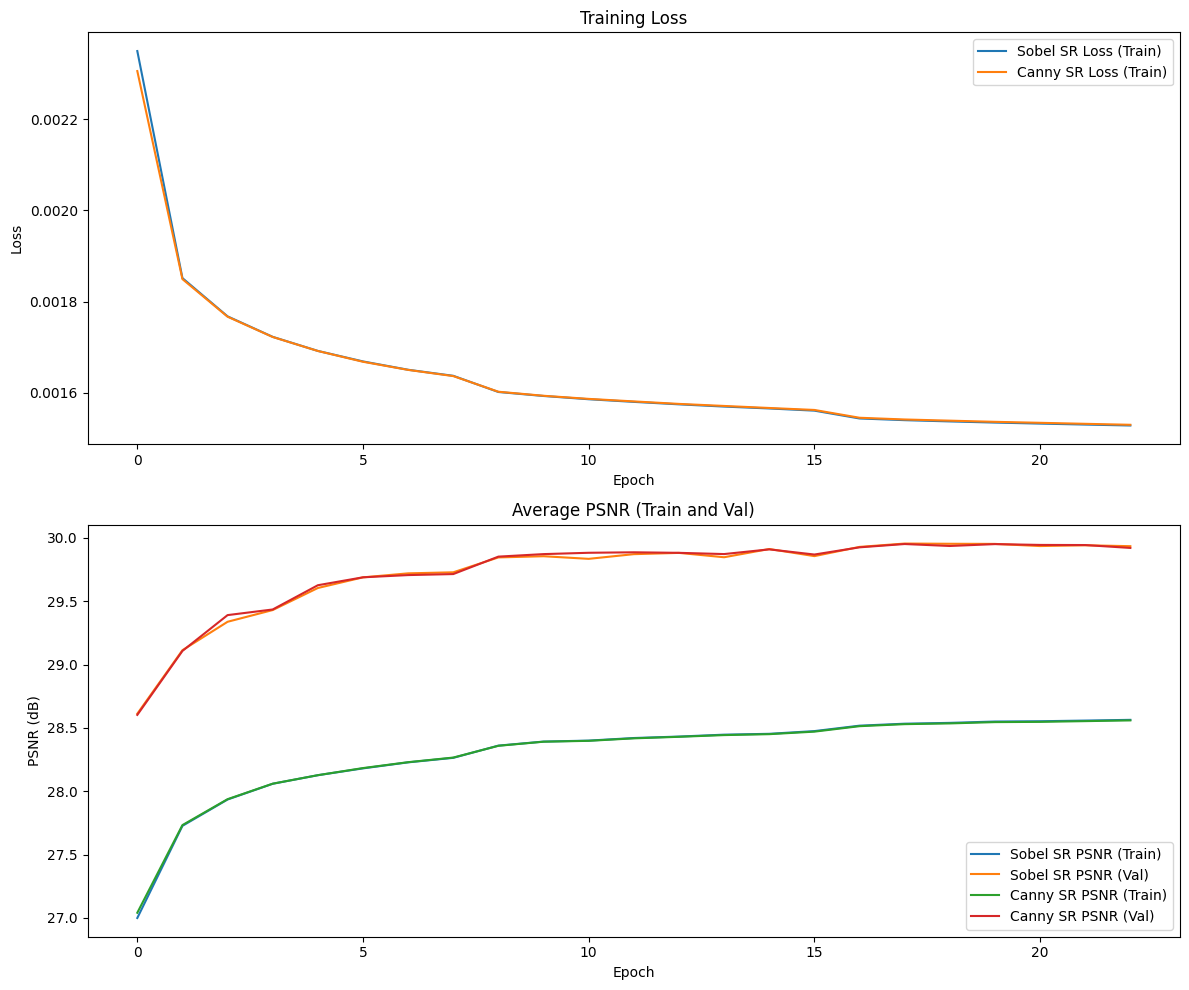

Validation Epoch 1/24: 100%|██████████| 10/10 [00:02<00:00,  3.37batch/s]

Epoch 1/24, Loss sobel: 0.0032, Loss canny: 0.0032, Time training: 675.1495s, PSNR sobel: 25.52 dB, PSNR canny: 25.54 dB, Val PSNR sobel: 26.55 dB, Val PSNR canny: 26.57 dB


RuntimeError: Parent directory outputs/weight_sr/x4 does not exist.

In [7]:
from torch.amp import autocast, GradScaler
from torchsummary import summary
scaler = GradScaler()

# Khởi tạo dataset và dataloader
for scale in [2, 3, 4]:
    train_lr_dir = f'dataset/Train/LR_{scale}'
    train_hr_dir = 'dataset/Train/HR'
    valid_lr_dir = 'dataset/Test/HR'
    valid_hr_dir = 'dataset/Test/HR'
    train_dataset = ImageDataset(train_lr_dir, train_hr_dir, scale=scale)
    train_loader = DataLoader(train_dataset, batch_size = 16, shuffle=True)

    valid_dataset = ImageDataset(valid_lr_dir, valid_hr_dir, scale=scale, valid=True)
    valid_loader = DataLoader(valid_dataset)

    # print(len(train_loader))
    # Khởi tạo mô hình, loss function và optimizer
    torch.cuda.empty_cache()

    sobelsr = HQSR(scale_factor = scale, use_sobel = True).to(device)
    # sobelsr.load_state_dict(torch.load('weight/best_sobel_srx4_model.pth', map_location=device))
    criterion = nn.MSELoss()
    optim_sobel = optim.Adam(sobelsr.parameters(), lr=1e-4,betas =(0.9, 0.999))
    scheduler_sobel = optim.lr_scheduler.StepLR(optim_sobel, step_size=10**5, gamma=0.5)
    # summary(sobelsr.cuda(), input_size=(3, 510, 339), device='cuda')
    cannysr = HQSR(scale_factor = scale, use_canny = True).to(device)
    # cannysr = nn.DataParallel(cannysr).to(device)
    # cannysr.load_state_dict(torch.load('weight/best_canny_srx4_model.pth', map_location=device))
    
    optim_canny = optim.Adam(cannysr.parameters(), lr=1e-4,betas =(0.9, 0.999))
    scheduler_canny = optim.lr_scheduler.StepLR(optim_canny, step_size=10**5, gamma=0.5)
    num_epochs = 24

    best_psnr_sobel = float('-inf')
    best_psnr_canny = float('-inf')
    torch.cuda.empty_cache()

    losses_sobel = []
    losses_canny = []
    avg_psnr_sobel = []
    avg_psnr_canny = []

    val_avg_psnr_sobel = []  # Validation PSNR
    val_avg_psnr_canny = []

    patience = 5
    epochs_no_improve = 0
    log_file = open('outputs/train_log/hqsr.txt', 'a')
    scaler = GradScaler()

    for epoch in range(num_epochs):
        sobelsr.train()
        cannysr.train()

        epoch_loss_sobel = 0
        psnr_values_sobel = 0
        epoch_loss_canny = 0
        psnr_values_canny = 0
        start_time = time.time()

        # Training loop
        for (lr_images, hr_images) in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            lr_images = lr_images.cuda()
            hr_images = hr_images.cuda()

            # Sobel SR training
            optim_sobel.zero_grad()  
            with autocast(device_type='cuda'):
                outputs_sobel = sobelsr(lr_images)
                loss_sobel = criterion(outputs_sobel, hr_images)
            psnr_sobel = calculate_psnr(outputs_sobel, hr_images)
                
            scaler.scale(loss_sobel).backward()
            scaler.step(optim_sobel)
            scaler.update()
            scheduler_sobel.step()

            # Canny SR training
            optim_canny.zero_grad()  
            with autocast(device_type='cuda'):
                outputs_canny = cannysr(lr_images)
                loss_canny = criterion(outputs_canny, hr_images)
            psnr_canny = calculate_psnr(outputs_canny, hr_images)

            scaler.scale(loss_canny).backward()
            scaler.step(optim_canny)
            scaler.update()
            scheduler_canny.step()
            
            # Update metrics
            epoch_loss_sobel += loss_sobel.item()
            psnr_values_sobel += psnr_sobel
            epoch_loss_canny += loss_canny.item()
            psnr_values_canny += psnr_canny

        # Calculate average training metrics
        avg_epoch_loss_sobel = epoch_loss_sobel / len(train_loader)
        average_psnr_sobel = psnr_values_sobel / len(train_loader)
        losses_sobel.append(avg_epoch_loss_sobel)
        avg_psnr_sobel.append(average_psnr_sobel)

        avg_epoch_loss_canny = epoch_loss_canny / len(train_loader)
        average_psnr_canny = psnr_values_canny / len(train_loader)
        losses_canny.append(avg_epoch_loss_canny)
        avg_psnr_canny.append(average_psnr_canny)

        # Validation step
        sobelsr.eval()
        cannysr.eval()

        val_psnr_values_sobel = 0
        val_psnr_values_canny = 0

        with torch.no_grad():  # No gradients during validation
            for (lr_images, hr_images) in tqdm(valid_loader, desc=f'Validation Epoch {epoch+1}/{num_epochs}', unit='batch'):
                lr_images = lr_images.cuda()
                hr_images = hr_images.cuda()

                # Sobel SR validation (no loss, only PSNR)
                outputs_sobel = sobelsr(lr_images)
                psnr_sobel = calculate_psnr(outputs_sobel, hr_images)

                # Canny SR validation (no loss, only PSNR)
                outputs_canny = cannysr(lr_images)
                psnr_canny = calculate_psnr(outputs_canny, hr_images)

                # Update validation PSNR
                val_psnr_values_sobel += psnr_sobel
                val_psnr_values_canny += psnr_canny

        # Calculate average validation PSNR
        val_average_psnr_sobel = val_psnr_values_sobel / len(valid_loader)
        val_avg_psnr_sobel.append(val_average_psnr_sobel)

        val_average_psnr_canny = val_psnr_values_canny / len(valid_loader)
        val_avg_psnr_canny.append(val_average_psnr_canny)

        end_time = time.time()

        # Logging results
        log_string = (f"Epoch {epoch+1}/{num_epochs}, Loss sobel: {avg_epoch_loss_sobel:.4f}, "
                    f"Loss canny: {avg_epoch_loss_canny:.4f}, Time training: {end_time - start_time:.4f}s, "
                    f"PSNR sobel: {average_psnr_sobel:.2f} dB, PSNR canny: {average_psnr_canny:.2f} dB, "
                    f"Val PSNR sobel: {val_average_psnr_sobel:.2f} dB, Val PSNR canny: {val_average_psnr_canny:.2f} dB")
        print(log_string)
        log_file.write(log_string + '\n')
        log_file.flush()

        # Save best models based on validation PSNR
        if val_average_psnr_sobel > best_psnr_sobel:
            best_psnr_sobel = val_average_psnr_sobel
            torch.save(sobelsr.state_dict(), f'outputs/weight_sr/x{scale}/best_hqsr_sobel.pth')
            print(f"Saved Sobel SR model with PSNR {best_psnr_sobel:.4f}")
            epochs_no_improve=0
        

        if val_average_psnr_canny > best_psnr_canny:
            best_psnr_canny = val_average_psnr_canny
            torch.save(cannysr.state_dict(), f'outputs/weight_sr/x{scale}/best_hqsr_canny.pth')
            print(f"Saved Canny SR model with PSNR {best_psnr_canny:.4f}")
            epochs_no_improve=0
        
        if (val_average_psnr_sobel < best_psnr_sobel) and (val_average_psnr_canny < best_psnr_canny):
            epochs_no_improve+=1
        if epochs_no_improve >= patience:
            print(f"PSNR did not improve for 50 epochs. Early stopping at epoch {epoch+1}")
            break
        # Clear cache and optionally save models at each epoch
        save_dir = f'outputs/path/x{scale}'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        torch.save(sobelsr.state_dict(), os.path.join(save_dir, f'hqsr_sobel_{epoch}.pth'))
        torch.save(cannysr.state_dict(), os.path.join(save_dir, f'hqsr_canny_{epoch}.pth'))
            # Close log file after training
    log_file.close()

    # Plotting results
    plt.figure(figsize=(12, 10))

    # Plot loss
    plt.subplot(2, 1, 1)
    plt.plot(losses_sobel, label='Sobel SR Loss (Train)')
    plt.plot(losses_canny, label='Canny SR Loss (Train)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')

    # Plot PSNR
    plt.subplot(2, 1, 2)
    plt.plot(avg_psnr_sobel, label='Sobel SR PSNR (Train)')
    plt.plot(val_avg_psnr_sobel, label='Sobel SR PSNR (Val)')
    plt.plot(avg_psnr_canny, label='Canny SR PSNR (Train)')
    plt.plot(val_avg_psnr_canny, label='Canny SR PSNR (Val)')
    plt.xlabel('Epoch')
    plt.ylabel('PSNR (dB)')
    plt.legend()
    plt.title('Average PSNR (Train and Val)')

    plt.tight_layout()
    plt.show()

In [ ]:
del sobelsr, cannysr
del optim_canny, optim_sobel, criterion
import gc
gc.collect()
torch.cuda.empty_cache()

# E2DSR

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch.nn.parallel import DataParallel
from torch.cuda.amp import autocast, GradScaler
import torch.nn.functional as F
from torchvision.utils import save_image
import torchsummary
from tqdm import tqdm
from models.e2dsr import *
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import time
class ImageDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, valid = False, scale=4):
        self.lr_files = sorted(os.listdir(lr_dir))
        self.hr_files = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.valid = valid
        self.scale = scale
    def __len__(self):
        return len(self.lr_files)

    def __getitem__(self, idx):
        lr_image = Image.open(os.path.join(self.lr_dir, self.lr_files[idx])).convert('RGB')
        hr_image = Image.open(os.path.join(self.hr_dir, self.hr_files[idx])).convert('RGB')
        
        w, h = hr_image.size
        if self.valid:
            lr_image = lr_image.resize((w//self.scale, h//self.scale))
            
        transform = transforms.Compose([
            # transforms.ToPILImage(),
            transforms.ToTensor()
        ])
        
        lr_image = transform(lr_image)
        hr_image = transform(hr_image)
        return lr_image, hr_image
def calculate_psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
    return psnr.item()

from torch.amp import autocast, GradScaler
scaler = GradScaler()

# Khởi tạo dataset và dataloader
for scale in [2, 3, 4]:
    train_lr_dir = f'dataset/Train/LR_{scale}'
    train_hr_dir = 'dataset/Train/HR'
    valid_lr_dir = 'dataset/Test/HR'
    valid_hr_dir = 'dataset/Test/HR'
    
    train_dataset = ImageDataset(train_lr_dir, train_hr_dir)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    valid_dataset = ImageDataset(valid_lr_dir, valid_hr_dir, valid = True, scale=scale)
    valid_loader = DataLoader(valid_dataset)

    # Khởi tạo loss function
    criterion = nn.MSELoss()
    e2dsr_sobel = E2DSR(edge_option='sobel', scale_factor=scale).to(device)
    e2dsr_canny = E2DSR(edge_option='canny', scale_factor=scale).to(device)
    # Khởi tạo optimizers, schedulers cho từng mô hình
    optim_e2dsr_canny = optim.Adam(e2dsr_canny.parameters(), lr=1e-4, betas=(0.9, 0.999))
    scheduler_e2dsr_canny = optim.lr_scheduler.StepLR(optim_e2dsr_canny, step_size=10**5, gamma=0.5)

    optim_e2dsr_sobel = optim.Adam(e2dsr_sobel.parameters(), lr=1e-4, betas=(0.9, 0.999))
    scheduler_e2dsr_sobel = optim.lr_scheduler.StepLR(optim_e2dsr_sobel, step_size=10**5, gamma=0.5)
    
    num_epochs = 24

    best_psnr_e2dsr_canny = float('-inf')
    best_psnr_e2dsr_sobel = float('-inf')
    torch.cuda.empty_cache()

    losses_e2dsr_canny = []
    losses_e2dsr_sobel = []

    avg_psnr_e2dsr_canny = []
    avg_psnr_e2dsr_sobel = []

    val_avg_psnr_e2dsr_canny = []
    val_avg_psnr_e2dsr_sobel = []

    patience = 5
    epochs_no_improve = 0
    log_file = open('e2dsr.txt', 'a')

    for epoch in range(num_epochs):
        e2dsr_canny.train()
        e2dsr_sobel.train()

        epoch_loss_e2dsr_canny, psnr_values_e2dsr_canny = 0, 0
        epoch_loss_e2dsr_sobel, psnr_values_e2dsr_sobel = 0, 0

        start_time = time.time()
        torch.cuda.empty_cache()
        # Training loop for each model
        for i, (lr_images, hr_images) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')):
            lr_images = lr_images.to(device)
            hr_images = hr_images.to(device)

            # # Train e2dsr_canny model
            optim_e2dsr_canny.zero_grad()
            with autocast(device_type='cuda'):
                outputs_e2dsr_canny = e2dsr_canny(lr_images)
                loss_e2dsr_canny = criterion(outputs_e2dsr_canny, hr_images)
            psnr_e2dsr_canny = calculate_psnr(outputs_e2dsr_canny, hr_images)

            scaler.scale(loss_e2dsr_canny).backward()
            scaler.step(optim_e2dsr_canny)
            scaler.update()
            scheduler_e2dsr_canny.step()

            epoch_loss_e2dsr_canny += loss_e2dsr_canny.item()
            
            psnr_values_e2dsr_canny += psnr_e2dsr_canny

            # Train e2dsr_sobel model
            optim_e2dsr_sobel.zero_grad()
            with autocast(device_type='cuda'):
                outputs_e2dsr_sobel = e2dsr_sobel(lr_images)
                loss_e2dsr_sobel = criterion(outputs_e2dsr_sobel, hr_images)
            psnr_e2dsr_sobel = calculate_psnr(outputs_e2dsr_sobel, hr_images)

            scaler.scale(loss_e2dsr_sobel).backward()
            scaler.step(optim_e2dsr_sobel)
            scaler.update()
            scheduler_e2dsr_sobel.step()

            epoch_loss_e2dsr_sobel += loss_e2dsr_sobel.item()
            psnr_values_e2dsr_sobel += psnr_e2dsr_sobel

        # Average losses and PSNRs
        avg_epoch_loss_e2dsr_canny = epoch_loss_e2dsr_canny / len(train_loader)
        avg_psnr_e2dsr_canny_epoch = psnr_values_e2dsr_canny / len(train_loader)
        losses_e2dsr_canny.append(avg_epoch_loss_e2dsr_canny)
        avg_psnr_e2dsr_canny.append(avg_psnr_e2dsr_canny_epoch)

        avg_epoch_loss_e2dsr_sobel = epoch_loss_e2dsr_sobel / len(train_loader)
        avg_psnr_e2dsr_sobel_epoch = psnr_values_e2dsr_sobel / len(train_loader)
        losses_e2dsr_sobel.append(avg_epoch_loss_e2dsr_sobel)
        avg_psnr_e2dsr_sobel.append(avg_psnr_e2dsr_sobel_epoch)

        # Validation for all models
        e2dsr_canny.eval()
        e2dsr_sobel.eval()

        val_psnr_e2dsr_canny, val_psnr_e2dsr_sobel = 0, 0
        val_psnr_vdsr, val_psnr_fsrcnn = 0, 0

        with torch.no_grad():
            for (lr_images, hr_images) in valid_loader:
                lr_images = lr_images.cuda()
                hr_images = hr_images.cuda()

                # # Validate e2dsr_canny
                outputs_e2dsr_canny = e2dsr_canny(lr_images)
                psnr_e2dsr_canny = calculate_psnr(outputs_e2dsr_canny, hr_images)
                val_psnr_e2dsr_canny += psnr_e2dsr_canny

                # Validate e2dsr_sobelbel
                outputs_e2dsr_sobel = e2dsr_sobel(lr_images)
                psnr_e2dsr_sobel = calculate_psnr(outputs_e2dsr_sobel, hr_images)
                val_psnr_e2dsr_sobel += psnr_e2dsr_sobel

        val_avg_psnr_e2dsr_canny_epoch = val_psnr_e2dsr_canny / len(valid_loader)
        val_avg_psnr_e2dsr_canny.append(val_avg_psnr_e2dsr_canny_epoch)

        val_avg_psnr_e2dsr_sobel_epoch = val_psnr_e2dsr_sobel / len(valid_loader)
        val_avg_psnr_e2dsr_sobel.append(val_avg_psnr_e2dsr_sobel_epoch)

        # Save best model
        if val_avg_psnr_e2dsr_canny_epoch > best_psnr_e2dsr_canny:
            best_psnr_e2dsr_canny = val_avg_psnr_e2dsr_canny_epoch
            torch.save(e2dsr_canny.state_dict(), f'outputs/weight_sr/x{scale}/best_e2dsr_canny.pth')
            print(f"Saved e2dsr_cannyR model with PSNR {best_psnr_e2dsr_canny:.4f}")
        if val_avg_psnr_e2dsr_sobel_epoch > best_psnr_e2dsr_sobel:
            best_psnr_e2dsr_sobel = val_avg_psnr_e2dsr_sobel_epoch
            torch.save(e2dsr_sobel.state_dict(), f'outputs/weight_sr/x{scale}/best_e2dsr_sobel.pth')
            print(f"Saved e2dsr_sobel model with PSNR {best_psnr_e2dsr_sobel:.4f}")

        torch.save(e2dsr_canny.state_dict(), f'outputs/path/e2dsr_canny_{epoch}.pth')
        torch.save(e2dsr_sobel.state_dict(), f'outputs/path/e2dsr_sobel_{epoch}.pth')


        print(f"Epoch [{epoch+1}/{num_epochs}] completed: e2dsr_canny Loss: {avg_epoch_loss_e2dsr_canny:.4f}, PSNR: {avg_psnr_e2dsr_canny_epoch:.4f}, Validation PSNR: {val_avg_psnr_e2dsr_canny_epoch:.4f},"
              "e2dsr_sobel Loss: {avg_epoch_loss_e2dsr_sobel:.4f}, PSNR: {avg_psnr_e2dsr_sobel_epoch:.4f}, Validation PSNR: {val_avg_psnr_e2dsr_sobel_epoch:.4f}")
    # 
        log_file.write(f"Epoch {epoch+1}:  e2dsr_canny PSNR: {avg_psnr_e2dsr_canny_epoch:.4f}, Validation PSNR: {val_avg_psnr_e2dsr_canny_epoch:.4f}\n")
        log_file.write(f"              e2dsr_sobel PSNR: {avg_psnr_e2dsr_sobel_epoch:.4f}, Validation PSNR: {val_avg_psnr_e2dsr_sobel_epoch:.4f}\n")

        log_file.flush()

    log_file.close()



Epoch 1/24:   1%|          | 76/12500 [00:05<14:38, 14.15batch/s]


KeyboardInterrupt: 

# SRResNEt EDSR

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch.nn.parallel import DataParallel
from torch.cuda.amp import autocast, GradScaler
import torch.nn.functional as F
from torchvision.utils import save_image
import torchsummary
from tqdm import tqdm
from models.srresnet import *
from models.edsr import *

import time
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class ImageDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, valid = False, scale=4):
        self.lr_files = sorted(os.listdir(lr_dir))
        self.hr_files = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.valid = valid
        self.scale = scale
    def __len__(self):
        return len(self.lr_files)

    def __getitem__(self, idx):
        lr_image = Image.open(os.path.join(self.lr_dir, self.lr_files[idx])).convert('RGB')
        hr_image = Image.open(os.path.join(self.hr_dir, self.hr_files[idx])).convert('RGB')
        
        w, h = hr_image.size
        if self.valid:
            lr_image = lr_image.resize((w//self.scale, h//self.scale))
            
        transform = transforms.Compose([
            # transforms.ToPILImage(),
            transforms.ToTensor()
        ])
        
        lr_image = transform(lr_image)
        hr_image = transform(hr_image)
        return lr_image, hr_image
    
def calculate_psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
    return psnr.item()

from torch.amp import autocast, GradScaler
scaler = GradScaler()

# Khởi tạo dataset và dataloader
for scale in [2, 3, 4]:
    train_lr_dir = f'dataset/Train/LR_{scale}'
    train_hr_dir = 'dataset/Train/HR'
    valid_lr_dir = 'dataset/Test/HR'
    valid_hr_dir = 'dataset/Test/HR'
    train_dataset = ImageDataset(train_lr_dir, train_hr_dir, scale=scale)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    valid_dataset = ImageDataset(valid_lr_dir, valid_hr_dir, scale=scale, valid = True)
    valid_loader = DataLoader(valid_dataset)

    # Khởi tạo loss function
    criterion = nn.MSELoss()
    edsr = EDSR(scale=scale).to(device)
    srresnet = SRResNet(scale=scale).to(device)
    
    # Khởi tạo optimizers, schedulers cho từng mô hình
    optim_edsr = optim.Adam(edsr.parameters(), lr=1e-4, betas=(0.9, 0.999))
    scheduler_edsr = optim.lr_scheduler.StepLR(optim_edsr, step_size=10**5, gamma=0.5)

    optim_srresnet = optim.Adam(srresnet.parameters(), lr=1e-4, betas=(0.9, 0.999))
    scheduler_srresnet = optim.lr_scheduler.StepLR(optim_srresnet, step_size=10**5, gamma=0.5)
    
    num_epochs = 24

    best_psnr_edsr = float('-inf')
    best_psnr_srresnet = float('-inf')

    torch.cuda.empty_cache()

    losses_edsr = []
    losses_srresnet = []

    avg_psnr_edsr = []
    avg_psnr_srresnet = []

    val_avg_psnr_edsr = []
    val_avg_psnr_srresnet = []

    patience = 5
    epochs_no_improve = 0
    log_file = open('outputs/train_log/edsr_srresnet.txt', 'a')

    for epoch in range(num_epochs):
        edsr.train()
        srresnet.train()

        epoch_loss_edsr, psnr_values_edsr = 0, 0
        epoch_loss_srresnet, psnr_values_srresnet = 0, 0

        start_time = time.time()
        torch.cuda.empty_cache()
        # Training loop for each model
        for i, (lr_images, hr_images) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')):
            lr_images = lr_images.to(device)
            hr_images = hr_images.to(device)

            # # Train EDSR model
            optim_edsr.zero_grad()
            with autocast(device_type='cuda'):
                outputs_edsr = edsr(lr_images)
                loss_edsr = criterion(outputs_edsr, hr_images)
            psnr_edsr = calculate_psnr(outputs_edsr, hr_images)

            scaler.scale(loss_edsr).backward()
            scaler.step(optim_edsr)
            scaler.update()
            scheduler_edsr.step()

            epoch_loss_edsr += loss_edsr.item()
            
            psnr_values_edsr += psnr_edsr
            # Train SRResNet model
            optim_srresnet.zero_grad()
            with autocast(device_type='cuda'):
                outputs_srresnet = srresnet(lr_images)
                loss_srresnet = criterion(outputs_srresnet, hr_images)
            psnr_srresnet = calculate_psnr(outputs_srresnet, hr_images)

            scaler.scale(loss_srresnet).backward()
            scaler.step(optim_srresnet)
            scaler.update()
            scheduler_srresnet.step()

            epoch_loss_srresnet += loss_srresnet.item()
            psnr_values_srresnet += psnr_srresnet


        # Average losses and PSNRs
        avg_epoch_loss_edsr = epoch_loss_edsr / len(train_loader)
        avg_psnr_edsr_epoch = psnr_values_edsr / len(train_loader)
        losses_edsr.append(avg_epoch_loss_edsr)
        avg_psnr_edsr.append(avg_psnr_edsr_epoch)

        avg_epoch_loss_srresnet = epoch_loss_srresnet / len(train_loader)
        avg_psnr_srresnet_epoch = psnr_values_srresnet / len(train_loader)
        losses_srresnet.append(avg_epoch_loss_srresnet)
        avg_psnr_srresnet.append(avg_psnr_srresnet_epoch)

        # Validation for all models
        edsr.eval()
        srresnet.eval()
    

        val_psnr_edsr, val_psnr_srresnet = 0, 0

        with torch.no_grad():
            for (lr_images, hr_images) in valid_loader:
                lr_images = lr_images.cuda()
                hr_images = hr_images.cuda()

                # # Validate EDSR
                outputs_edsr = edsr(lr_images)
                psnr_edsr = calculate_psnr(outputs_edsr, hr_images)
                val_psnr_edsr += psnr_edsr

                # Validate SRResNet
                outputs_srresnet = srresnet(lr_images)
                psnr_srresnet = calculate_psnr(outputs_srresnet, hr_images)
                val_psnr_srresnet += psnr_srresnet

        val_avg_psnr_edsr_epoch = val_psnr_edsr / len(valid_loader)
        val_avg_psnr_edsr.append(val_avg_psnr_edsr_epoch)

        val_avg_psnr_srresnet_epoch = val_psnr_srresnet / len(valid_loader)
        val_avg_psnr_srresnet.append(val_avg_psnr_srresnet_epoch)

    
        # Save best model
        if val_avg_psnr_edsr_epoch > best_psnr_edsr:
            best_psnr_edsr = val_avg_psnr_edsr_epoch
            torch.save(edsr.state_dict(), f'outputs/weight_sr/x{scale}/best_edsr.pth')
            print(f"Saved EDSRR model with PSNR {best_psnr_edsr:.4f}")
        if val_avg_psnr_srresnet_epoch > best_psnr_srresnet:
            best_psnr_srresnet = val_avg_psnr_srresnet_epoch
            torch.save(srresnet.state_dict(), f'outputs/weight_sr/x{scale}/best_srresnet.pth')
            print(f"Saved SRResNet model with PSNR {best_psnr_srresnet:.4f}")

        torch.save(edsr.state_dict(), f'outputs/path/edsr_{epoch}.pth')
        torch.save(srresnet.state_dict(), f'outputs/path/srresnet_{epoch}.pth')
        

        print(f"Epoch [{epoch+1}/{num_epochs}] completed: EDSR Loss: {avg_epoch_loss_edsr:.4f}, PSNR: {avg_psnr_edsr_epoch:.4f}, Validation PSNR: {val_avg_psnr_edsr_epoch:.4f},"
            "SRResNEt Loss: {avg_epoch_loss_srresnet:.4f}, PSNR: {avg_psnr_srresnet_epoch:.4f}, Validation PSNR: {val_avg_psnr_srresnet_epoch:.4f}")

        log_file.write(f"Epoch {epoch+1}:  EDSR PSNR: {avg_psnr_edsr_epoch:.4f}, Validation PSNR: {val_avg_psnr_edsr_epoch:.4f}\n")
        log_file.write(f"              SRResNet PSNR: {avg_psnr_srresnet_epoch:.4f}, Validation PSNR: {val_avg_psnr_srresnet_epoch:.4f}\n")
        
        log_file.flush()

    log_file.close()



Epoch 1/24:   0%|          | 0/12500 [00:00<?, ?batch/s]/home/robot/anaconda3/envs/pcb/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epoch 1/24:   0%|          | 53/12500 [00:03<12:13, 16.96batch/s]


KeyboardInterrupt: 

# SRCNN 

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch.nn.parallel import DataParallel
from torch.cuda.amp import autocast, GradScaler
import torch.nn.functional as F
from torchvision.utils import save_image

from tqdm import tqdm
from models.vdsr import *
from models.srcnn import *
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ImageDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, valid = False, scale=4, vdsr = False):
        self.lr_files = sorted(os.listdir(lr_dir))
        self.hr_files = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.valid = valid
        self.scale = scale
        self.vdsr = vdsr
    def __len__(self):
        return len(self.lr_files)

    def __getitem__(self, idx):
        lr_image = Image.open(os.path.join(self.lr_dir, self.lr_files[idx])).convert('RGB')
        hr_image = Image.open(os.path.join(self.hr_dir, self.hr_files[idx])).convert('RGB')
        
        w, h = hr_image.size
  
        if self.valid:
            lr_image = lr_image.resize((w//self.scale, h//self.scale))
        if self.vdsr:
            lr_image = lr_image.resize((w, h))
        transform = transforms.Compose([
            # transforms.ToPILImage(),
            transforms.ToTensor()
        ])
        
        lr_image = transform(lr_image)
        hr_image = transform(hr_image)
        return lr_image, hr_image
from torch.amp import autocast, GradScaler
scaler = GradScaler()

# Khởi tạo dataset và dataloader
for scale in [2, 3, 4]:
    train_lr_dir = f'dataset/Train/LR_{scale}'
    train_hr_dir = 'dataset/Train/HR'
    valid_lr_dir = 'dataset/Test/HR'
    valid_hr_dir = 'dataset/Test/HR'
    vdsr = VDSR().to(device)
    srcnn = SRCNN().to(device)
    train_dataset = ImageDataset(train_lr_dir, train_hr_dir,scale=scale, vdsr=True)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    valid_dataset = ImageDataset(valid_lr_dir, valid_hr_dir, valid=True, scale=scale,vdsr=True)
    valid_loader = DataLoader(valid_dataset)

    # Khởi tạo loss function
    criterion = nn.MSELoss()
    
    optim_srcnn = optim.Adam(srcnn.parameters(), lr=1e-5, betas=(0.9, 0.999))
    scheduler_srcnn = optim.lr_scheduler.StepLR(optim_srcnn, step_size=10**5, gamma=0.5)

    optim_vdsr = optim.Adam(vdsr.parameters(), lr=1e-4, betas=(0.9, 0.999))
    scheduler_vdsr = optim.lr_scheduler.StepLR(optim_vdsr, step_size=10**5, gamma=0.5)
    # Hàm tính PSNR
    def calculate_psnr(img1, img2):
        mse = torch.mean((img1 - img2) ** 2)
        if mse == 0:
            return float('inf')
        max_pixel = 1.0
        psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
        return psnr.item()

    num_epochs = 24

    best_psnr_srcnn = float('-inf')
    best_psnr_vdsr = float('-inf')
    torch.cuda.empty_cache()

    losses_srcnn = []
    losses_vdsr = []

    avg_psnr_srcnn = []
    avg_psnr_vdsr = []

    val_avg_psnr_srcnn = []
    val_avg_psnr_vdsr = []

    patience = 5
    epochs_no_improve = 0
    log_file = open('outputs/train_log/srcnnn_vdsr.txt', 'a')

    for epoch in range(num_epochs):
        srcnn.train()
        vdsr.train()

        epoch_loss_srcnn, psnr_values_srcnn = 0, 0
        epoch_loss_vdsr, psnr_values_vdsr = 0, 0
        start_time = time.time()

        # Training loop for srcnn
        for (lr_images, hr_images) in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            lr_images = lr_images.cuda()
            hr_images = hr_images.cuda()

            # Train srcnn model
            optim_srcnn.zero_grad()
            with autocast(device_type='cuda'):
                outputs_srcnn =srcnn(lr_images)
                loss_srcnn = criterion(outputs_srcnn, hr_images)
            psnr_srcnn = calculate_psnr(outputs_srcnn, hr_images)
            # if psnr_srcnn < 27:
            scaler.scale(loss_srcnn).backward()
            scaler.step(optim_srcnn)
            scaler.update()
            scheduler_srcnn.step()

            epoch_loss_srcnn += loss_srcnn.item()
            psnr_values_srcnn += psnr_srcnn

            optim_vdsr.zero_grad()
            with autocast(device_type='cuda'):
                outputs_vdsr = vdsr(lr_images)
                loss_vdsr = criterion(outputs_vdsr, hr_images)
            psnr_vdsr = calculate_psnr(outputs_vdsr, hr_images)

            scaler.scale(loss_vdsr).backward()
            scaler.step(optim_vdsr)
            scaler.update()
            scheduler_vdsr.step()

            epoch_loss_vdsr += loss_vdsr.item()
            psnr_values_vdsr += psnr_vdsr
        
        # Training loop for vdsr
    
            
        # Average losses and PSNRs
        avg_epoch_loss_srcnn = epoch_loss_srcnn / len(train_loader)
        avg_psnr_srcnn_epoch = psnr_values_srcnn / len(train_loader)
        losses_srcnn.append(avg_epoch_loss_srcnn)
        avg_psnr_srcnn.append(avg_psnr_srcnn_epoch)

        avg_epoch_loss_vdsr = epoch_loss_vdsr / len(train_loader)
        avg_psnr_vdsr_epoch = psnr_values_vdsr / len(train_loader)
        losses_vdsr.append(avg_epoch_loss_vdsr)
        avg_psnr_vdsr.append(avg_psnr_vdsr_epoch)

        # Validation for srcnn and vdsr
        srcnn.eval()
        vdsr.eval()

        val_psnr_srcnn, val_psnr_vdsr = 0, 0

        with torch.no_grad():
            # Validate srcnn
            for (lr_images, hr_images) in valid_loader:
                lr_images = lr_images.cuda()
                hr_images = hr_images.cuda()

                outputs_srcnn = srcnn(lr_images)
                psnr_srcnn = calculate_psnr(outputs_srcnn, hr_images)
                val_psnr_srcnn += psnr_srcnn


                outputs_vdsr = vdsr(lr_images)
                psnr_vdsr = calculate_psnr(outputs_vdsr, hr_images)
                val_psnr_vdsr += psnr_vdsr
            # Validate vdsr
            


        val_avg_psnr_srcnn_epoch = val_psnr_srcnn / len(valid_loader)
        val_avg_psnr_srcnn.append(val_avg_psnr_srcnn_epoch)

        val_avg_psnr_vdsr_epoch = val_psnr_vdsr / len(valid_loader)
        val_avg_psnr_vdsr.append(val_avg_psnr_vdsr_epoch)

        # Save best model for srcnn
        if val_avg_psnr_srcnn_epoch > best_psnr_srcnn:
            best_psnr_srcnn = val_avg_psnr_srcnn_epoch
            torch.save(srcnn.state_dict(), f'outputs/weight_sr/x{scale}/best_srcnn.pth')
            print(f"Saved SRCNN model with PSNR {best_psnr_srcnn:.4f}")
        # Save best model for vdsr
        if val_avg_psnr_vdsr_epoch > best_psnr_vdsr:
            best_psnr_vdsr = val_avg_psnr_vdsr_epoch
            torch.save(vdsr.state_dict(), f'outputs/weight_sr/x{scale}/best_vdsr.pth')
            print(f"Saved VDSR model with PSNR {best_psnr_vdsr:.4f}")

        torch.save(srcnn.state_dict(), f'outputs/path/srcnn_{epoch+10}.pth')
        torch.save(vdsr.state_dict(), f'outputs/path/vdsr_{epoch+10}.pth')
        print(f"Epoch [{epoch+1}/{num_epochs}] completed: srcnn Loss: {avg_epoch_loss_srcnn:.4f}, PSNR: {avg_psnr_srcnn_epoch:.4f}, Validation PSNR: {val_avg_psnr_srcnn_epoch:.4f}")
        print(f"Epoch [{epoch+1}/{num_epochs}] completed: vdsr Loss: {avg_epoch_loss_vdsr:.4f}, PSNR: {avg_psnr_vdsr_epoch:.4f}, Validation PSNR: {val_avg_psnr_vdsr_epoch:.4f}")

        log_file.write(f"Epoch {epoch+1}: WDSRA PSNR: {avg_psnr_srcnn_epoch:.4f}, Validation PSNR: {val_avg_psnr_srcnn_epoch:.4f}\n")
        log_file.write(f"Epoch {epoch+1}: vdsr PSNR: {avg_psnr_vdsr_epoch:.4f}, Validation PSNR: {val_avg_psnr_vdsr_epoch:.4f}\n")

        # log_file.flush()

    log_file.close()


Epoch 1/24:   0%|          | 0/12500 [00:00<?, ?batch/s]/home/robot/anaconda3/envs/pcb/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epoch 1/24:   1%|          | 137/12500 [00:06<09:35, 21.48batch/s]


KeyboardInterrupt: 